**Корректность проверена на Python 3.6:**
+ numpy 1.15.4
+ pandas 0.23.4

# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [2]:
import pandas as pd
adver_data = pd.read_csv('advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [3]:
# Ваш код здесь
adver_data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
# Ваш код здесь
adver_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [5]:
X = adver_data[['TV', 'Radio', 'Newspaper']].values# Ваш код здесь
y = adver_data[['Sales']].values# Ваш код здесь

**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [6]:
means, stds = X.mean(axis=0), X.std(axis=0)# Ваш код здесь

In [7]:
X = (X - means) / stds# Ваш код здесь

**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [8]:
import numpy as np
X = np.hstack((np.ones(shape=(len(X), 1)), X)) # Ваш код здесь
X[:5]

array([[ 1.        ,  0.96985227,  0.98152247,  1.77894547],
       [ 1.        , -1.19737623,  1.08280781,  0.66957876],
       [ 1.        , -1.51615499,  1.52846331,  1.78354865],
       [ 1.        ,  0.05204968,  1.21785493,  1.28640506],
       [ 1.        ,  0.3941822 , -0.84161366,  1.28180188]])

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [9]:
def mserror(y, y_pred):
    # Ваш код здесь
    return np.mean((y-y_pred)**2)

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'1 задание'.***

In [10]:
answer1 = mserror(y, np.median(y))# Ваш код здесь
print(round(answer1, 3))

28.346


**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [11]:
def normal_equation(X, y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)  # Ваш код здесь

In [12]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

[[14.0225    ]
 [ 3.91925365]
 [ 2.79206274]
 [-0.02253861]]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Полученный результат, округленный до 3 знаков после запятой, является ответом на *'2 задание'*.**

In [13]:
answer2 = norm_eq_weights[0][0]# Ваш код здесь
print(round(answer2, 3))

14.022


**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [14]:
def linear_prediction(X, w):
    # Ваш код здесь
    return X.dot(w)

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения?
Полученный результат, округленный до 3 знаков после запятой, является ответом на *'3 задание'***

In [15]:
answer3 = mserror(y, linear_prediction(X, norm_eq_weights))# Ваш код здесь
print(round(answer3, 3))

2.784


**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

In [92]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    sample_x = X[train_ind].ravel()
    sample_y = y[train_ind].ravel()[0]
    w = w.ravel()
    y_pred = w[0] * sample_x[0] + w[1] * sample_x[1] + w[2] * sample_x[2] + w[3] * sample_x[3]
    grad0 = -2 * sample_x[0] * (sample_y - y_pred) # Ваш код здесь
    grad1 = -2 * sample_x[1] * (sample_y - y_pred) # Ваш код здесь
    grad2 = -2 * sample_x[2] * (sample_y - y_pred) # Ваш код здесь
    grad3 = -2 * sample_x[3] * (sample_y - y_pred) # Ваш код здесь
    return  w - eta / len(y) * np.array([grad0, grad1, grad2, grad3])

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [93]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        preds = linear_prediction(X, w.reshape(-1, 1))
        error = mserror(y, preds)
        errors.append(error)
        
        random_ind = np.random.randint(X.shape[0])
        new_w = stochastic_gradient_step(X, y, w, random_ind, eta)
        weight_dist = np.linalg.norm(w - new_w, 2)
        
        w = new_w.copy()
        
        if verbose and iter_num % 100 == 0:
            print(f'Iter={iter_num} -- Error = {error}')
        # Ваш код здесь
        iter_num += 1
    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [94]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(
    X,
    y,
    w_init=np.array([0, 0, 0, 0]),
    max_iter=1e5, 
    verbose=True,
    eta=0.01,
    seed=42
)
    # Ваш код здесь

Iter=0 -- Error = 223.71625
Iter=100 -- Error = 219.3092295241692
Iter=200 -- Error = 214.89695426587926
Iter=300 -- Error = 210.15950720868102
Iter=400 -- Error = 205.85399443219308
Iter=500 -- Error = 201.67950610106996
Iter=600 -- Error = 197.46060695002387
Iter=700 -- Error = 193.89712018020882
Iter=800 -- Error = 190.4543733276431
Iter=900 -- Error = 186.8199390528102
Iter=1000 -- Error = 183.24755385232987
Iter=1100 -- Error = 179.50679254700415
Iter=1200 -- Error = 176.22082609390148
Iter=1300 -- Error = 172.9898519186071
Iter=1400 -- Error = 169.36814177834356
Iter=1500 -- Error = 165.65860695913753
Iter=1600 -- Error = 162.57757254767003
Iter=1700 -- Error = 159.0828140995536
Iter=1800 -- Error = 155.87582256605918
Iter=1900 -- Error = 153.00829182088856
Iter=2000 -- Error = 149.99675458151748
Iter=2100 -- Error = 147.06121398542516
Iter=2200 -- Error = 143.980231438969
Iter=2300 -- Error = 140.96786353326826
Iter=2400 -- Error = 138.02198031285988
Iter=2500 -- Error = 135.339

Iter=21900 -- Error = 5.595124830374414
Iter=22000 -- Error = 5.544510056525419
Iter=22100 -- Error = 5.50119299195295
Iter=22200 -- Error = 5.459730306160041
Iter=22300 -- Error = 5.400134938757336
Iter=22400 -- Error = 5.346981521991434
Iter=22500 -- Error = 5.292016023287648
Iter=22600 -- Error = 5.233832569107833
Iter=22700 -- Error = 5.185807344708085
Iter=22800 -- Error = 5.132090129579198
Iter=22900 -- Error = 5.085628657560813
Iter=23000 -- Error = 5.033276853021009
Iter=23100 -- Error = 4.980656156212709
Iter=23200 -- Error = 4.942797317996637
Iter=23300 -- Error = 4.887718811166208
Iter=23400 -- Error = 4.840687816850431
Iter=23500 -- Error = 4.791782196270626
Iter=23600 -- Error = 4.759885096014867
Iter=23700 -- Error = 4.714194932930504
Iter=23800 -- Error = 4.675390307806314
Iter=23900 -- Error = 4.64518353276203
Iter=24000 -- Error = 4.613508699960694
Iter=24100 -- Error = 4.586491935620135
Iter=24200 -- Error = 4.550900447568532
Iter=24300 -- Error = 4.522641448182694
It

Iter=48100 -- Error = 2.8005205790276815
Iter=48200 -- Error = 2.8001227030176157
Iter=48300 -- Error = 2.799645233284042
Iter=48400 -- Error = 2.799177251427126
Iter=48500 -- Error = 2.7987868093262653
Iter=48600 -- Error = 2.7988652009478767
Iter=48700 -- Error = 2.7981182761591414
Iter=48800 -- Error = 2.797646025210607
Iter=48900 -- Error = 2.797037829224682
Iter=49000 -- Error = 2.7977183514242365
Iter=49100 -- Error = 2.7973491624637488
Iter=49200 -- Error = 2.797044900014418
Iter=49300 -- Error = 2.7970013684782007
Iter=49400 -- Error = 2.79682142017318
Iter=49500 -- Error = 2.796745946731362
Iter=49600 -- Error = 2.796328071857033
Iter=49700 -- Error = 2.7958581131734532
Iter=49800 -- Error = 2.795862861189474
Iter=49900 -- Error = 2.7957302592219353
Iter=50000 -- Error = 2.794571220121894
Iter=50100 -- Error = 2.794577920119403
Iter=50200 -- Error = 2.7941951823348656
Iter=50300 -- Error = 2.794324874305045
Iter=50400 -- Error = 2.7942840953833037
Iter=50500 -- Error = 2.79409

Iter=78200 -- Error = 2.784883327992179
Iter=78300 -- Error = 2.7849199442786676
Iter=78400 -- Error = 2.7847621380903234
Iter=78500 -- Error = 2.7847445253050602
Iter=78600 -- Error = 2.784731275818237
Iter=78700 -- Error = 2.784719773922153
Iter=78800 -- Error = 2.7846090259000142
Iter=78900 -- Error = 2.7847346922107725
Iter=79000 -- Error = 2.784850806503994
Iter=79100 -- Error = 2.7846767093284415
Iter=79200 -- Error = 2.7845043483849263
Iter=79300 -- Error = 2.78450476610504
Iter=79400 -- Error = 2.7845439407122785
Iter=79500 -- Error = 2.7845334241326953
Iter=79600 -- Error = 2.7845339525555404
Iter=79700 -- Error = 2.7845866757149462
Iter=79800 -- Error = 2.784522890758236
Iter=79900 -- Error = 2.7844396580128237
Iter=80000 -- Error = 2.7844014183860977
Iter=80100 -- Error = 2.784486291674699
Iter=80200 -- Error = 2.784433527119512
Iter=80300 -- Error = 2.784370047915396
Iter=80400 -- Error = 2.7843654525825254
Iter=80500 -- Error = 2.7843722187806215
Iter=80600 -- Error = 2.78

**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


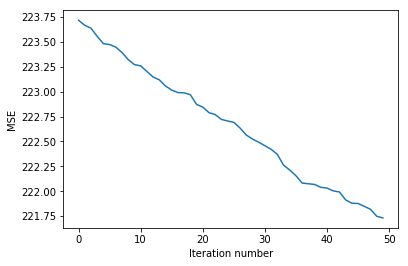

In [95]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


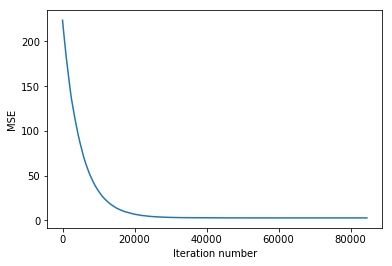

In [96]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [97]:
stoch_grad_desc_weights

array([ 1.40190566e+01,  3.91069256e+00,  2.78209808e+00, -8.10462217e-03])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [98]:
stoch_errors_by_iter[-1]

2.784412588352759

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'4 задание'*.**

In [99]:
stoch_preds = linear_prediction(X, stoch_grad_desc_weights.reshape(-1, 1))

In [100]:
answer4 = mserror(y, stoch_preds)# Ваш код здесь
print(round(answer4, 3))

2.784
